<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202302/t36_Aula_7_KMeans_RF_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Carga de Bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Carga de dados
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

<AxesSubplot:xlabel='wt', ylabel='mpg'>

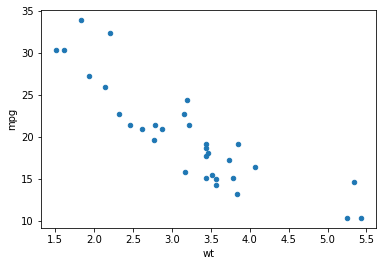

In [6]:
# Análise Exploratória
df.plot.scatter(x='wt', y='mpg')

In [39]:
# Transformação de dados - (feature engineering)
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01']  = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='wt', ylabel='mpg'>

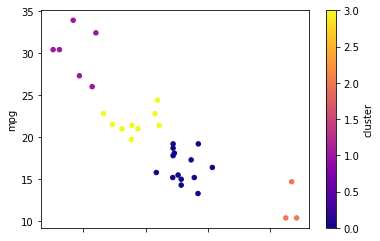

In [41]:
# Execução do KMeans
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01','wt01']])

df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

In [71]:
#################################
## Aula 7 - Mais algoritmos Classificadores
# Machine Learning no Titanic com RandomForest e SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

# 1.Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

# 2. Análise exploratória
# Construção Dummy Sex
dummies_Sex = pd.get_dummies(df['Sex'])
df['SexFemale'] = dummies_Sex['female']
# Construção Dummy Pclass
dummies_Pclass = pd.get_dummies(df['Pclass'], prefix='c')
df['Pclass1'] = dummies_Pclass['c_1']
df['Pclass2'] = dummies_Pclass['c_2']

# Tratamento de dados - preenchimento de idades nulas
ageMed = df['Age'].mean()
df['Age'] = df['Age'].fillna(ageMed)

# 3. Separação de Treino e Teste
# X_treino, X_teste, Y_treino, Y_teste = train_test_split( df[['SexFemale']], df['Survived'], test_size=0.25, random_state=33 )
X_treino, X_teste, Y_treino, Y_teste = train_test_split( df[['SexFemale','Age','Pclass1', 'Pclass2']], df['Survived'], test_size=0.25 )


In [72]:
# 4. model
#mod = RandomForestClassifier(random_state=1, n_estimators=50)
mod = svm.SVC() # svm
mod = mod.fit(X_treino, Y_treino)

# 5. Previsão
Y_prev = mod.predict(X_teste)

# Avaliação de previsões em classificadores
pd.crosstab(Y_prev, Y_teste, margins=True)

Survived,0,1,All
row_0,,,
0,130,78,208
1,5,10,15
All,135,88,223


In [73]:
# Métricas de avaliação de modelos classificadores
print(accuracy_score (Y_teste, Y_prev) )
print(precision_score (Y_teste, Y_prev) )
print(recall_score (Y_teste, Y_prev) )

0.6278026905829597
0.6666666666666666
0.11363636363636363


In [76]:
#################################
# AUTO ML: pyCaret
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached numba-0.54.1-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached mlflow-2.2.1-py3-none-any.whl (17.6 MB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-5.4.1-cp39-cp39-manylinux1_x86_64.whl (630 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scipy-1.5.4-cp39-cp39-manylinux1_x86_64.whl (25.8 MB)
  Using cached pyod-1.0.8.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached spacy-2.3.9-cp39-c

In [1]:

# 0. Carga de bibliotecas
import pandas as pd
from pycaret.classification import *
# 1.Carga de Dados
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')
# 2. Setup do conjunto
s = setup(df, target='Survived')

# Comparação de Modelos
best = compare_models()


evaluate_model(best)

ValueError: ignored